In [157]:
import random

# 기본 수 100개를 생성
rand_num = []
for i in range(100):
    x = random.randint(0,10)
    y = random.randint(0,10)
    if x+y <= 5:    # A
        c = 1    
    elif  (x+y) <= 10:   # B
        c=2
    elif (x+y) <= 15:   # C
        c=3 
    elif (x+y) <= 20:   # D
        c = 4
    rand_num.append([x, y, c])


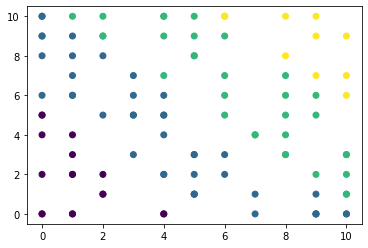

In [159]:
import pandas as pd
df = pd.DataFrame(rand_num, columns=['x', 'y', 'c'])   # 수 100개를 데이터 프레임으로 변경
import matplotlib.pyplot as plt

# 점 100개 산점도 그려보기
plt.scatter(df['x'],df['y'], c=df['c'])
plt.show()

In [160]:
rand_num2 = []
# 새로운 점 10개 생성
for i in range(10):
    x = random.randint(0,10)
    y = random.randint(0,10)
    rand_num2.append([x, y, 'NaN'])


In [162]:
k = 3     # k 값 지정

A = 0
B = 0
C = 0
D = 0

k_count = 0
i = 0

final_color = ''

# 어떤 점 x, y를 줄 시 그 점에 기존 점들이 있는가, 있다면 무슨 색인지를 통해 A, B, C, D를 카운트함
def check_color(x, y):
    global k_count
    global k
    global A
    global B
    global C
    global D
    color = 0
    for i in range(100):
        if k_count == k:
            return -1
        if rand_num[i][0] == x and rand_num[i][1] == y:
            color = rand_num[i][2]

            if color == 1:
                A += 1
            elif color == 2:
                B += 1
            elif color == 3:
                C += 1
            elif color == 4:
                D += 1
                
            k_count += 1

# 선택한 점에서부터 반경을 지정함
# 위, 아래, 오른족, 왼쪽 부터
# 가장자리 순으로 이동함
def around_count(x, y, num):

        if check_color(x+num, y) == -1:
            return -1
        if check_color(x-num, y) == -1:
            return -1
        if check_color(x, y+num) == -1:
            return -1
        if check_color(x, y-num) == -1:
            return -1

        for j in range(num -1) :
            if check_color(x+num, y+j+1) == -1:
                return -1
            if check_color(x+num, y-j-1) == -1:
                return -1
            if check_color(x-num, y+j+1) == -1:
                return -1
            if check_color(x-num, y-j-1) == -1:
                return -1
            if check_color(x+j+1, y-1) == -1:
                return -1
            if check_color(x-j-1, y-1) == -1:
                return -1
            if check_color(x+1+j, y+1) == -1:
                return -1
            if check_color(x-j-1, y+1) == -1:
                return -1

        if check_color(x+num, y+num) == -1:
            return -1
        if check_color(x+num, y-num) == -1:
            return -1
        if check_color(x-num, y+num) == -1:
            return -1
        if check_color(x-num, y-num) == -1:
            return -1
        

# 주변의 k만큼의 점들로부터 class를 얻으면 최종적인 클래스를 지정함
def end(i):
    global final_color
    global A
    global B
    global C
    global D

    final_color='C'
    final_num = C
    if final_num < B :
        final_color = 'B'
        final_num = B
    if final_num < A:
        final_color='A'
        final_num = A
    if final_num < D:
        final_color = 'D'
        final_num = D

    rand_num2[i][2] = final_color

    print((str(i) + '번째 값들 ', A, B, C, D))

    A = 0
    B = 0
    C = 0
    D = 0
        
# 위의 함수들을 통해 10개의 새로운 점들을 처리
for i in range(0, 10):
    x = rand_num2[i][0]
    y = rand_num2[i][1]
    k_count = 0

    if check_color(x, y) == -1:
        end(i)
    else :
        if around_count(x, y, 1) == -1:
            end(i)
        else :
            if around_count(x, y, 2) == -1:
                end(i)
            else :
                if around_count(x, y, 3) == -1:
                    end(i)

('0번째 값들 ', 0, 2, 1, 0)
('1번째 값들 ', 0, 0, 3, 0)
('2번째 값들 ', 0, 0, 3, 0)
('3번째 값들 ', 0, 3, 0, 0)
('4번째 값들 ', 0, 0, 2, 1)
('5번째 값들 ', 2, 1, 0, 0)
('6번째 값들 ', 0, 0, 3, 0)
('7번째 값들 ', 0, 2, 1, 0)
('8번째 값들 ', 3, 0, 0, 0)
('9번째 값들 ', 0, 0, 3, 0)


In [163]:
# 최종적인 클래스 배치
rand_num2

[[2, 8, 'B'],
 [7, 5, 'C'],
 [6, 4, 'C'],
 [2, 5, 'B'],
 [7, 7, 'C'],
 [1, 5, 'A'],
 [4, 9, 'C'],
 [7, 2, 'B'],
 [1, 3, 'A'],
 [8, 4, 'C']]